In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/jewelry_with_header (2).csv')

In [ ]:
df

,order_date,order_id,user_id,purchase,category_id,category,brand,price,price_id,buyer,colour1,colour2,type
0,2018-12-01 11:40:29 UTC,1924719191579950000,1842195256808830000,1,1.806829e+18,jewelry.earring,0.000000e+00,561.51,1.515916e+18,NaN,red,gold,diamond
1,2018-12-01 17:38:31 UTC,1924899396621690000,1806829193678290000,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
2,2018-12-02 13:53:42 UTC,1925511016616030000,1842214461889310000,1,1.806829e+18,jewelry.pendant,1.000000e+00,54.66,1.515916e+18,f,white,gold,sapphire
3,2018-12-02 17:44:02 UTC,1925626951238680000,1835566849434050000,1,1.806829e+18,jewelry.pendant,0.000000e+00,88.90,1.515916e+18,f,red,gold,diamond
4,2018-12-02 21:30:19 UTC,1925740842841010000,1873936840742920000,1,1.806829e+18,jewelry.necklace,0.000000e+00,417.67,1.515916e+18,NaN,red,gold,amethyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95906,2021-12-01 09:47:37 UTC,2719016587653800000,1515966223597820000,1,NaN,0,1.515920e+18,NaN,NaN,NaN,NaN,NaN,NaN
95907,2021-12-01 09:50:37 UTC,2719018098886700000,1956663830729720000,1,1.806829e+18,NaN,0.000000e+00,229.99,1.515916e+18,NaN,red,gold,NaN
95908,2021-12-01 09:52:06 UTC,2719018846999540000,1956663848219960000,1,1.806829e+18,jewelry.earring,1.000000e+00,630.00,1.515916e+18,f,white,gold,diamond
95909,2021-12-01 09:55:35 UTC,2719020596963830000,1835566854106510000,1,1.806829e+18,jewelry.earring,0.000000e+00,83.42,1.515916e+18,NaN,white,gold,fianit


In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
df['date'] = pd.to_datetime(df['order_date']).dt.date
df['date']

0        2018-12-01
1        2018-12-01
2        2018-12-02
3        2018-12-02
4        2018-12-02
            ...    
95906    2021-12-01
95907    2021-12-01
95908    2021-12-01
95909    2021-12-01
95910    2021-12-01
Name: date, Length: 95911, dtype: object

In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['year'][:5]

0    2018
1    2018
2    2018
3    2018
4    2018
Name: year, dtype: int64

In [ ]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['month'][:5]

0    12
1    12
2    12
3    12
4    12
Name: month, dtype: int64

In [ ]:
df

,order_date,order_id,user_id,purchase,category_id,category,brand,price,price_id,buyer,colour1,colour2,type,date,year,month
0,2018-12-01 11:40:29 UTC,1924719191579950000,1842195256808830000,1,1.806829e+18,jewelry.earring,0.000000e+00,561.51,1.515916e+18,NaN,red,gold,diamond,2018-12-01,2018,12
1,2018-12-01 17:38:31 UTC,1924899396621690000,1806829193678290000,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN,2018-12-01,2018,12
2,2018-12-02 13:53:42 UTC,1925511016616030000,1842214461889310000,1,1.806829e+18,jewelry.pendant,1.000000e+00,54.66,1.515916e+18,f,white,gold,sapphire,2018-12-02,2018,12
3,2018-12-02 17:44:02 UTC,1925626951238680000,1835566849434050000,1,1.806829e+18,jewelry.pendant,0.000000e+00,88.90,1.515916e+18,f,red,gold,diamond,2018-12-02,2018,12
4,2018-12-02 21:30:19 UTC,1925740842841010000,1873936840742920000,1,1.806829e+18,jewelry.necklace,0.000000e+00,417.67,1.515916e+18,NaN,red,gold,amethyst,2018-12-02,2018,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95906,2021-12-01 09:47:37 UTC,2719016587653800000,1515966223597820000,1,NaN,0,1.515920e+18,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-01,2021,12
95907,2021-12-01 09:50:37 UTC,2719018098886700000,1956663830729720000,1,1.806829e+18,NaN,0.000000e+00,229.99,1.515916e+18,NaN,red,gold,NaN,2021-12-01,2021,12
95908,2021-12-01 09:52:06 UTC,2719018846999540000,1956663848219960000,1,1.806829e+18,jewelry.earring,1.000000e+00,630.00,1.515916e+18,f,white,gold,diamond,2021-12-01,2021,12
95909,2021-12-01 09:55:35 UTC,2719020596963830000,1835566854106510000,1,1.806829e+18,jewelry.earring,0.000000e+00,83.42,1.515916e+18,NaN,white,gold,fianit,2021-12-01,2021,12


In [ ]:

df['category'] =  df['category'].str.split('.')
df['sub_category'] = df['category'].str[1]

In [ ]:

jewelry_list = ['pendant', 'necklace', 'earring', 'ring', 'brooch','bracelet', 'clocks', 'souvenir']
df = df[df['sub_category'].isin(jewelry_list)]
df['sub_category'].value_counts()

earring     29052
ring        28300
pendant     13088
bracelet     6188
necklace     2361
brooch       1288
souvenir      170
clocks        167
Name: sub_category, dtype: int64

In [ ]:
df.head()

,order_date,order_id,user_id,purchase,category_id,category,brand,price,price_id,buyer,colour1,colour2,type,date,year,month,sub_category
0,2018-12-01 11:40:29 UTC,1924719191579950000,1842195256808830000,1,1.806829e+18,"[jewelry, earring]",0.0,561.51,1.515916e+18,NaN,red,gold,diamond,2018-12-01,2018,12,earring
2,2018-12-02 13:53:42 UTC,1925511016616030000,1842214461889310000,1,1.806829e+18,"[jewelry, pendant]",1.0,54.66,1.515916e+18,f,white,gold,sapphire,2018-12-02,2018,12,pendant
3,2018-12-02 17:44:02 UTC,1925626951238680000,1835566849434050000,1,1.806829e+18,"[jewelry, pendant]",0.0,88.90,1.515916e+18,f,red,gold,diamond,2018-12-02,2018,12,pendant
4,2018-12-02 21:30:19 UTC,1925740842841010000,1873936840742920000,1,1.806829e+18,"[jewelry, necklace]",0.0,417.67,1.515916e+18,NaN,red,gold,amethyst,2018-12-02,2018,12,necklace
5,2018-12-02 22:09:34 UTC,1925760595336880000,1835566854827930000,1,1.806829e+18,"[jewelry, earring]",1.0,102.27,1.515916e+18,NaN,red,gold,NaN,2018-12-02,2018,12,earring


In [ ]:
df2 = df.copy()
df2.drop(columns=['order_id','year','category','order_date'],inplace=True)

In [ ]:
df2.head()

,user_id,purchase,category_id,brand,price,price_id,buyer,colour1,colour2,type,date,month,sub_category
0,1842195256808830000,1,1.806829e+18,0.0,561.51,1.515916e+18,NaN,red,gold,diamond,2018-12-01,12,earring
2,1842214461889310000,1,1.806829e+18,1.0,54.66,1.515916e+18,f,white,gold,sapphire,2018-12-02,12,pendant
3,1835566849434050000,1,1.806829e+18,0.0,88.90,1.515916e+18,f,red,gold,diamond,2018-12-02,12,pendant
4,1873936840742920000,1,1.806829e+18,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst,2018-12-02,12,necklace
5,1835566854827930000,1,1.806829e+18,1.0,102.27,1.515916e+18,NaN,red,gold,NaN,2018-12-02,12,earring


In [ ]:
df2['user_id'].nunique()

4420

In [ ]:
df2.isnull().sum()

user_id             0
purchase            0
category_id         0
brand            3505
price               0
price_id            0
buyer           36133
colour1          2235
colour2            92
type            19606
date                0
month               0
sub_category        0
dtype: int64

In [ ]:
# NAN remove

In [ ]:
import seaborn as sns

df2['category_id'] = df2['category_id'].fillna(df2['category_id'].mode()[0])
df2['brand'] = df2['brand'].fillna(df2['brand'].mode()[0])
df2['price_id'] = df2['price_id'].fillna(df2['price_id'].mode()[0])
df2['buyer'] = df2['buyer'].fillna(df2['buyer'].mode()[0])
df2['colour1'] = df2['colour1'].fillna(df2['colour1'].mode()[0])
df2['colour2'] = df2['colour2'].fillna(df2['colour2'].mode()[0])
df2['type'] = df2['type'].fillna(df2['type'].mode()[0])
df2['sub_category'] = df2['sub_category'].fillna(df2['sub_category'].mode()[0])

In [ ]:
df2.isnull().sum()

user_id         0
purchase        0
category_id     0
brand           0
price           0
price_id        0
buyer           0
colour1         0
colour2         0
type            0
date            0
month           0
sub_category    0
dtype: int64

In [ ]:
df2.shape

(80614, 13)

In [ ]:
df3 = df2.dropna(subset=['price'])

In [ ]:
df3.size

1047982

In [ ]:
df = df3.copy()

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df['user_id']= label_encoder.fit_transform(df['user_id'])
df['purchase']= label_encoder.fit_transform(df['purchase'])
df['category_id']= label_encoder.fit_transform(df['category_id'])
df['brand']= label_encoder.fit_transform(df['brand'])
df['price_id']= label_encoder.fit_transform(df['price_id'])
df['buyer']= label_encoder.fit_transform(df['buyer'])
df['colour1']= label_encoder.fit_transform(df['colour1'])
df['colour2']= label_encoder.fit_transform(df['colour2'])
df['type']= label_encoder.fit_transform(df['type'])
df['month']= label_encoder.fit_transform(df['month'])
df['sub_category']= label_encoder.fit_transform(df['sub_category'])



In [ ]:
df.head()

,user_id,purchase,category_id,brand,price,price_id,buyer,colour1,colour2,type,date,month,sub_category
0,2783,0,11,0,561.51,1343,0,0,0,8,2018-12-01,11,3
2,2784,0,12,1,54.66,422,0,2,0,23,2018-12-02,11,5
3,2313,0,12,0,88.90,1342,0,0,0,8,2018-12-02,11,5
4,3027,0,13,0,417.67,1049,0,0,0,2,2018-12-02,11,4
5,2326,0,11,1,102.27,1666,0,0,0,8,2018-12-02,11,3


In [ ]:
def forward_selection(df, target, significance_level=0.05):
    initial_features = df.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(df[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

<Axes: >

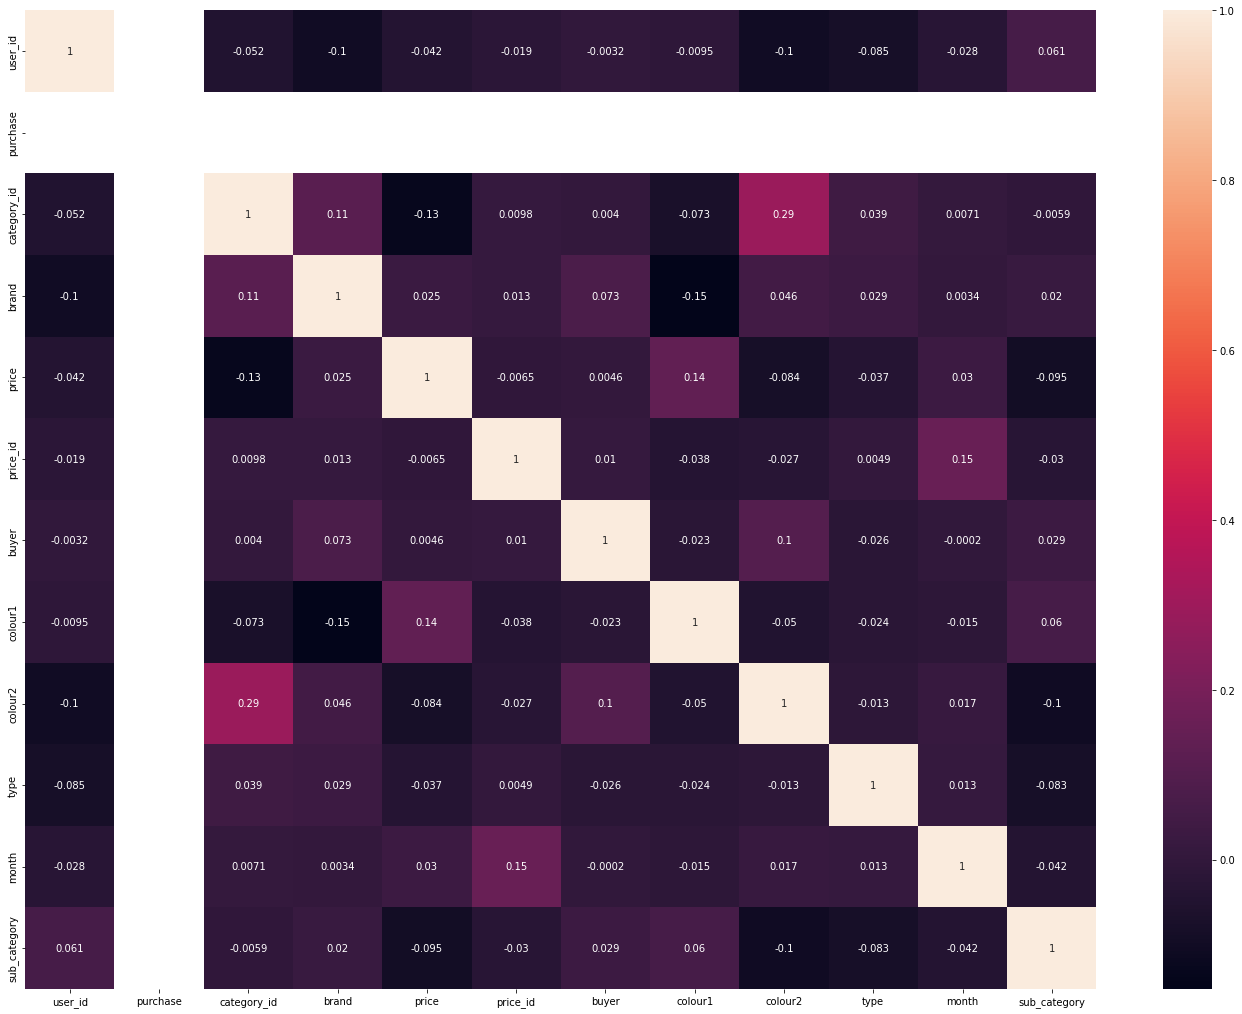

In [ ]:
plt.figure(figsize=(24,18)) 
sns.heatmap(df.corr(), annot=True) 


In [ ]:
X = df.drop(['price','date'], axis=1)
y = df['price']
label_encoder = preprocessing.LabelEncoder()
y= label_encoder.fit_transform(y)

In [ ]:
X.dtypes

user_id         int64
purchase        int64
category_id     int64
brand           int64
price_id        int64
buyer           int64
colour1         int64
colour2         int64
type            int64
month           int64
sub_category    int64
dtype: object

In [ ]:
y

array([2060,  170,  371, ..., 2166,  339,  415])

In [ ]:
l1 = forward_selection(X,y)
new_data = df[l1]
new_data['price'] = df['price']
new_data['date'] = df['date']

In [ ]:
new_data.head()

,colour2,colour1,sub_category,category_id,type,user_id,brand,buyer,month,price_id,price,date
0,0,0,3,11,8,2783,0,0,11,1343,561.51,2018-12-01
2,0,2,5,12,23,2784,1,0,11,422,54.66,2018-12-02
3,0,0,5,12,8,2313,0,0,11,1342,88.90,2018-12-02
4,0,0,4,13,2,3027,0,0,11,1049,417.67,2018-12-02
5,0,0,3,11,8,2326,1,0,11,1666,102.27,2018-12-02


In [ ]:
new_data.shape

(80614, 12)

In [ ]:
new_data.dtypes

colour2           int64
colour1           int64
sub_category      int64
category_id       int64
type              int64
user_id           int64
brand             int64
buyer             int64
month             int64
price_id          int64
price           float64
date             object
dtype: object

In [ ]:
new_data = new_data[new_data['price'] < 25000]
new_data

,category_id,colour1,colour2,sub_category,type,brand,buyer,user_id,month,price_id,price
0,15,1,0,3,8,0,0,2880,11,1382,561.51
1,12,4,0,3,8,0,0,2290,11,500,212.14
2,16,3,0,5,23,1,0,2881,11,438,54.66
3,16,1,0,5,8,0,0,2397,11,1381,88.90
4,17,1,0,4,2,0,0,3128,11,1080,417.67
...,...,...,...,...,...,...,...,...,...,...,...
95905,12,1,0,3,8,0,0,4005,11,17353,134.29
95907,12,1,0,3,8,0,0,3861,11,17353,229.99
95908,15,3,0,3,8,1,0,4288,11,17352,630.00
95909,15,3,0,3,11,0,0,2406,11,17353,83.42


In [ ]:
new_data.to_csv('/content/finaldata3.csv')